In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2

[  0   0   0 ... 959 959 959]
[   0    0    0 ... 1279 1279 1279]
[0 1 2 ... 1 2 3]


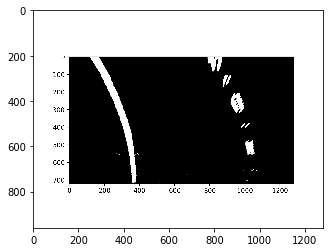

In [2]:
test_image_path = "output_images/Figure_1.png"
test_image = mpimg.imread(test_image_path)
plt.imshow(test_image)
nonzero_points = test_image.nonzero()
print(nonzero_points[0])
print(nonzero_points[1])
print(nonzero_points[2])

In [7]:
#if FindingLanes.fit_lane_pixels(nonzero_points):
#         return

image_height = test_image.shape[0]
# Take a histogram of the bottom half of the image
histogram = np.sum(test_image[test_image.shape[0]//2:,:], axis=0)
plt.plot(histogram)
 # Create an output image to draw on and visualize the result
out_img = np.dstack((test_image, test_image, test_image))
#print(out_img)
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]//2)
#print(histogram[:midpoint])
leftx_base = np.argmax(histogram[100:midpoint]) + 100
rightx_base = np.argmax(histogram[midpoint:-100]) + midpoint

y = np.linspace(0,image_height-1,image_height)
x = np.linspace(0, test_image.shape[1]-1, test_image.shape[1])
plt.scatter(x,y)
plt.show()
print(midpoint)
print(leftx_base)
print(rightx_base)
        
#all_variables.left_lane_window_positions, left_lane_points_x , left_lane_points_y, left_out_img = FindingLanes.step_through_sliding_windows(nonzero_points, leftx_base, image_height, out_img)
#all_variables.right_lane_window_positions, right_lane_points_x , right_lane_points_y, right_out_img = FindingLanes.step_through_sliding_windows(nonzero_points, rightx_base, image_height, left_out_img)

#GLV.global_left_lane_points_x.append(left_lane_points_x)
#GLV.global_left_lane_points_y.append(left_lane_points_y)
#GLV.global_right_lane_points_x.append(right_lane_points_x)
#GLV.global_right_lane_points_y.append(right_lane_points_y)

# For testing - plot the image.
# right_out_image contains both left and right as we are passing the left_out_img 2nd time to "step_through_sliding_windows"
# plot_my_images.plot_an_image(right_out_img)
  

ValueError: x and y must be the same size

In [ ]:
@staticmethod
def fit_lane_pixels(nonzero_points):
    if GLV.global_left_lane_poly is None:
        return False

    margin = 100
    minpoints = 10
    Y=np.array(nonzero_points[0])
    X=np.array(nonzero_points[1])

    poly = GLV.global_left_lane_poly
    left_fit_x = poly[0]*(Y**2) + poly[1]*Y + poly[2]
    poly = GLV.global_right_lane_poly
    right_fit_x = poly[0]*(Y**2) + poly[1]*Y + poly[2]

    left_indices = (X > (left_fit_x - margin)) & (X < (left_fit_x + margin))
    right_indices = (X > (right_fit_x - margin)) & (X < (right_fit_x + margin))

    if( len(left_indices) < minpoints or len(right_indices) < minpoints):
         return False

    if(len(X[left_indices]) > 5):
         GLV.global_left_lane_points_x.append(X[left_indices])
         GLV.global_left_lane_points_y.append(Y[left_indices])
         GLV.global_left_lane_poly = np.polyfit(X[left_indices],Y[left_indices],2)

    if(len(X[right_indices]) > 5):
         GLV.global_right_lane_points_x.append(X[right_indices])
         GLV.global_right_lane_points_y.append(Y[right_indices])
         GLV.global_right_lane_poly = np.polyfit(X[right_indices],Y[right_indices],2)
         return True